[weights_wemo0.25_wctx0.75.csv] → emotional_alignment: 3.00 | progression: 3.15 | cohesion: 2.60 | diversity: 3.25 | overall_appeal: 3.05


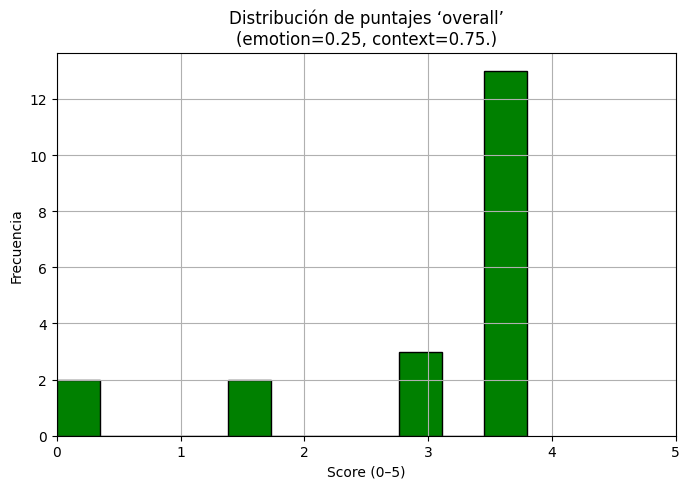

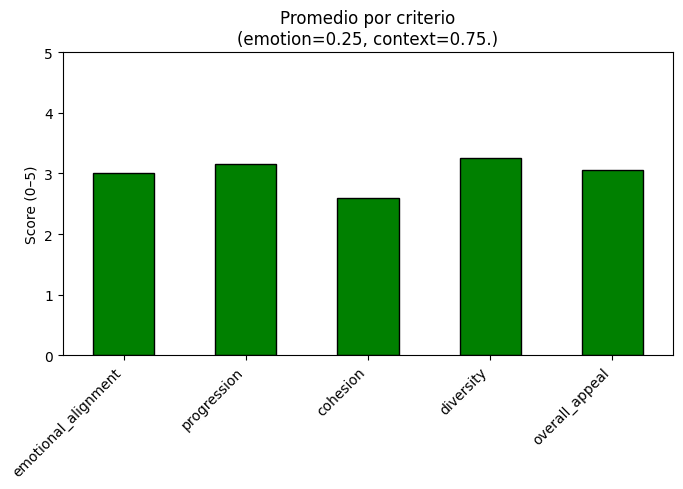

[weights_wemo0.75_wctx0.25.csv] → emotional_alignment: 3.35 | progression: 3.50 | cohesion: 2.90 | diversity: 3.65 | overall_appeal: 3.40


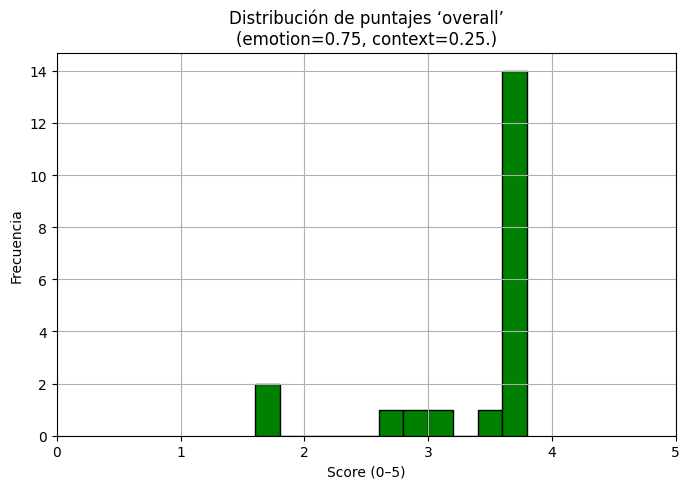

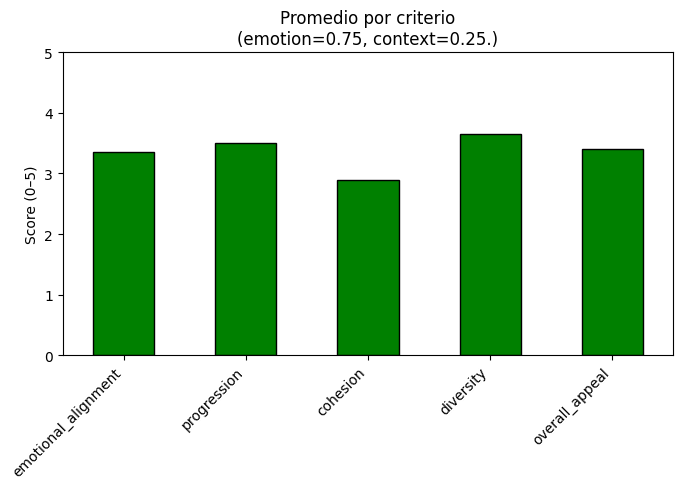

[weights_wemo0.5_wctx0.5.csv] → emotional_alignment: 3.14 | progression: 3.42 | cohesion: 2.84 | diversity: 3.58 | overall_appeal: 3.26


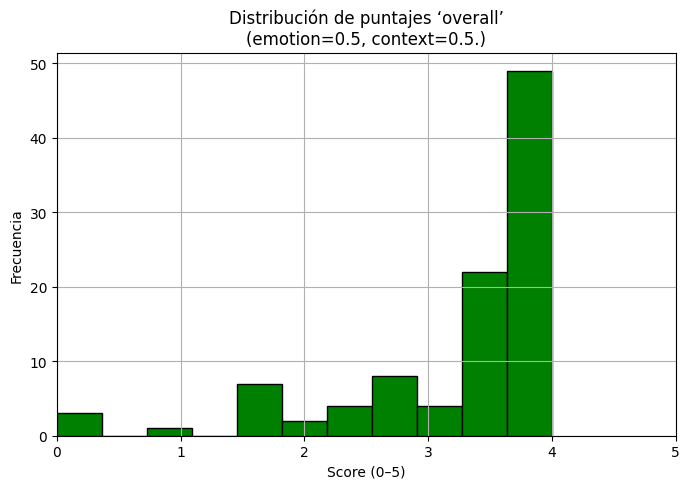

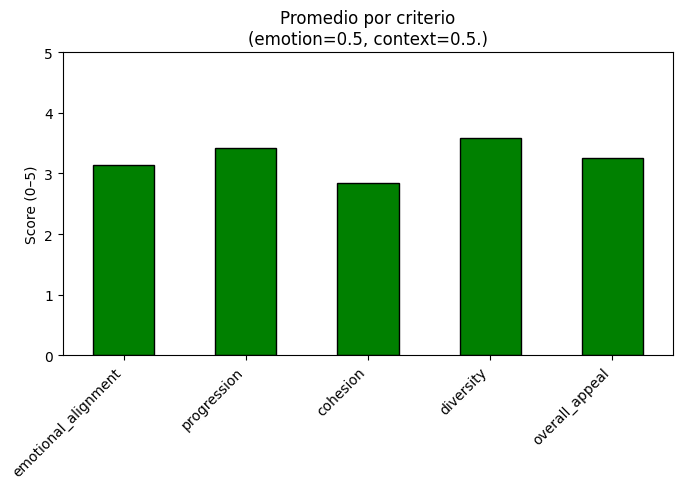

In [ ]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt

folder = "output_results"
labels = ["emotional_alignment", "progression", "cohesion", "diversity", "overall_appeal"]

for filename in os.listdir(folder):
    if filename.endswith(".csv"):
        df = pd.read_csv(os.path.join(folder, filename))
        means = df[labels].mean()
        print(f"[{filename}] → " + " | ".join(f"{col}: {means[col]:.2f}" for col in labels))

        match = re.search(r"wemo([\d.]+)_wctx([\d.]+)", filename)
        if match:
            wemo = match.group(1)
            wctx = match.group(2)
        else:
            wemo = wctx = "?"

        # Histograma de overall
        plt.figure(figsize=(7, 5))
        df["overall"].hist(bins=11, color='green', edgecolor='black')
        plt.title(f"Distribución de puntajes ‘overall’\n(emotion={wemo}, context={wctx})")
        plt.xlabel("Score (0–5)")
        plt.ylabel("Frecuencia")
        plt.xlim(0, 5)
        plt.tight_layout()
        plt.show()

        # Barras de promedios por criterio
        plt.figure(figsize=(7, 5))
        means.plot(kind="bar", color='green', edgecolor='black')
        plt.ylim(0, 5)
        plt.title(f"Promedio por criterio\n(emotion={wemo}, context={wctx})")
        plt.xticks(rotation=45, ha="right")
        plt.ylabel("Score (0–5)")
        plt.tight_layout()
        plt.show()
